In [1]:
wsi_labels_path = '/media/yanis/LaCie/Final_execution_files/train/labels_csv/labels.csv'
features_path = '/media/yanis/LaCie/Final_execution_files/train/features_final/'
test_labels_csv_path = '/media/yanis/LaCie/Camelyon16/evaluation/reference.csv'

In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

def generate_class_balanced_split(directory_path):


    labels_df = pd.read_csv(test_labels_csv_path)

    filenames = [f for f in os.listdir(directory_path) if f.endswith('.pt')]
    
    slide_ids = ['_'.join(filename.split('_')[:2]) for filename in filenames]

    labels = []

    for slide_id in slide_ids:
        if 'normal' in slide_id:
            label = 'normal_tissue'
        elif 'tumor' in slide_id:
            label = 'tumor_tissue'
        else:
            matching_rows = labels_df[labels_df['image'].str.startswith(slide_id)]
            if not matching_rows.empty:
                label = matching_rows.iloc[0]['class']
                if label == 'negative':
                    label = 'normal_tissue'
                else:
                    label = 'tumor_tissue'
            else:
                label = 'unknown'

        labels.append(label)    

    df = pd.DataFrame({'slide_id': slide_ids, 'label': labels})
    train_df_list = []
    val_df_list = []
    for label in df['label'].unique():
        class_subset = df[df['label'] == label]
        train_subset, val_subset = train_test_split(class_subset, test_size=0.20, random_state=42)
        train_df_list.append(train_subset)
        val_df_list.append(val_subset)

    train_df = pd.concat(train_df_list)
    train_df['split_membership'] = 'train'
    val_df = pd.concat(val_df_list)
    val_df['split_membership'] = 'val'

    final_df = pd.concat([train_df, val_df]).sort_values(by='slide_id')

    return final_df

# Usage
directory_path = '/media/yanis/LaCie/Final_execution_files/train/features_final/'
csv_output_path = wsi_labels_path

split_df = generate_class_balanced_split(directory_path)
split_df.to_csv(csv_output_path, index=False)


In [3]:
from torch.utils.data import Dataset
import pandas as pd
import torch

class WSI_dataset(Dataset):
    def __init__(self,wsi_list,features_path):
        self.wsi_list = wsi_list
        self.features_path = features_path
        self.label_to_int = {'normal_tissue': 0, 'tumor_tissue': 1}
    def __len__(self):
        return len(self.wsi_list)

    def __getitem__(self, idx):
        name = self.wsi_list[idx]['slide_id']
        label = torch.tensor(self.label_to_int[self.wsi_list[idx]['label']], dtype=torch.long)
        features = torch.load(self.features_path+name+'_features.pt')
        return (features,label)

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_combined_loss(train_loss_values, val_loss_values, epochs):
    plt.figure(figsize=(10, 6))

    plt.plot(epochs, train_loss_values, label='Train Loss', color='blue')

    plt.plot(epochs, val_loss_values, label='Validation Loss', color='red')

    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss per Epoch')
    plt.legend()
    plt.grid(True)
    plt.show()

Setting tau to 1.0
starting epoch  0


100%|███████████████████████████████████████████| 78/78 [01:00<00:00,  1.29it/s]


Epoch: 0, train_loss: 0.7217


100%|███████████████████████████████████████████| 20/20 [00:10<00:00,  1.84it/s]


Epoch: 0, val_loss: 0.6972, AUC: 0.64, accuracy: 0.50, precision: 0.50, recall: 1.00, f1: 0.67
starting epoch  1


100%|███████████████████████████████████████████| 78/78 [00:07<00:00, 10.72it/s]


Epoch: 1, train_loss: 0.7017


100%|███████████████████████████████████████████| 20/20 [00:00<00:00, 20.08it/s]


Epoch: 1, val_loss: 0.6884, AUC: 0.75, accuracy: 0.50, precision: 0.00, recall: 0.00, f1: 0.00
starting epoch  2


100%|███████████████████████████████████████████| 78/78 [00:03<00:00, 21.46it/s]


Epoch: 2, train_loss: 0.7145


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 19.74it/s]


Epoch: 2, val_loss: 0.6815, AUC: 0.71, accuracy: 0.65, precision: 0.80, recall: 0.40, f1: 0.53
starting epoch  3


100%|███████████████████████████████████████████| 78/78 [00:04<00:00, 15.61it/s]


Epoch: 3, train_loss: 0.7117


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 18.18it/s]


Epoch: 3, val_loss: 0.6990, AUC: 0.76, accuracy: 0.50, precision: 0.50, recall: 1.00, f1: 0.67
starting epoch  4


100%|███████████████████████████████████████████| 78/78 [00:03<00:00, 22.33it/s]


Epoch: 4, train_loss: 0.7017


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 19.40it/s]


Epoch: 4, val_loss: 0.6636, AUC: 0.90, accuracy: 0.75, precision: 0.73, recall: 0.80, f1: 0.76
starting epoch  5


100%|███████████████████████████████████████████| 78/78 [00:03<00:00, 23.09it/s]


Epoch: 5, train_loss: 0.6883


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 13.90it/s]


Epoch: 5, val_loss: 0.6594, AUC: 0.81, accuracy: 0.60, precision: 0.57, recall: 0.80, f1: 0.67
starting epoch  6


100%|███████████████████████████████████████████| 78/78 [00:03<00:00, 22.00it/s]


Epoch: 6, train_loss: 0.6950


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 12.24it/s]


Epoch: 6, val_loss: 0.6868, AUC: 0.80, accuracy: 0.50, precision: 0.50, recall: 1.00, f1: 0.67
starting epoch  7


100%|███████████████████████████████████████████| 78/78 [00:03<00:00, 21.11it/s]


Epoch: 7, train_loss: 0.6999


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 18.01it/s]


Epoch: 7, val_loss: 0.6457, AUC: 0.91, accuracy: 0.55, precision: 1.00, recall: 0.10, f1: 0.18
starting epoch  8


100%|███████████████████████████████████████████| 78/78 [00:03<00:00, 22.64it/s]


Epoch: 8, train_loss: 0.6668


100%|███████████████████████████████████████████| 20/20 [00:00<00:00, 20.08it/s]


Epoch: 8, val_loss: 0.6150, AUC: 0.90, accuracy: 0.80, precision: 0.71, recall: 1.00, f1: 0.83
starting epoch  9


100%|███████████████████████████████████████████| 78/78 [00:03<00:00, 22.53it/s]


Epoch: 9, train_loss: 0.6635


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 19.05it/s]


Epoch: 9, val_loss: 0.6061, AUC: 0.93, accuracy: 0.75, precision: 1.00, recall: 0.50, f1: 0.67
starting epoch  10


100%|███████████████████████████████████████████| 78/78 [00:03<00:00, 21.69it/s]


Epoch: 10, train_loss: 0.6215


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 19.93it/s]


Epoch: 10, val_loss: 0.5630, AUC: 0.89, accuracy: 0.80, precision: 0.88, recall: 0.70, f1: 0.78
starting epoch  11


100%|███████████████████████████████████████████| 78/78 [00:04<00:00, 18.57it/s]


Epoch: 11, train_loss: 0.6452


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 13.54it/s]


Epoch: 11, val_loss: 0.5659, AUC: 0.91, accuracy: 0.80, precision: 0.75, recall: 0.90, f1: 0.82
starting epoch  12


100%|███████████████████████████████████████████| 78/78 [00:04<00:00, 19.44it/s]


Epoch: 12, train_loss: 0.6211


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 17.79it/s]


Epoch: 12, val_loss: 0.5604, AUC: 0.90, accuracy: 0.80, precision: 0.75, recall: 0.90, f1: 0.82
starting epoch  13


100%|███████████████████████████████████████████| 78/78 [00:03<00:00, 21.11it/s]


Epoch: 13, train_loss: 0.5753


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 17.61it/s]


Epoch: 13, val_loss: 0.5800, AUC: 0.94, accuracy: 0.75, precision: 1.00, recall: 0.50, f1: 0.67
starting epoch  14


100%|███████████████████████████████████████████| 78/78 [00:03<00:00, 22.32it/s]


Epoch: 14, train_loss: 0.5545


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 19.39it/s]


Epoch: 14, val_loss: 0.4811, AUC: 0.94, accuracy: 0.75, precision: 0.86, recall: 0.60, f1: 0.71
starting epoch  15


100%|███████████████████████████████████████████| 78/78 [00:03<00:00, 21.97it/s]


Epoch: 15, train_loss: 0.5765


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 19.64it/s]


Epoch: 15, val_loss: 0.4996, AUC: 0.93, accuracy: 0.75, precision: 1.00, recall: 0.50, f1: 0.67
starting epoch  16


100%|███████████████████████████████████████████| 78/78 [00:03<00:00, 22.48it/s]


Epoch: 16, train_loss: 0.4866


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 19.19it/s]


Epoch: 16, val_loss: 0.4236, AUC: 0.94, accuracy: 0.80, precision: 0.88, recall: 0.70, f1: 0.78
starting epoch  17


100%|███████████████████████████████████████████| 78/78 [00:03<00:00, 19.61it/s]


Epoch: 17, train_loss: 0.4817


100%|███████████████████████████████████████████| 20/20 [00:02<00:00,  6.67it/s]


Epoch: 17, val_loss: 0.4645, AUC: 0.94, accuracy: 0.70, precision: 0.83, recall: 0.50, f1: 0.62
starting epoch  18


100%|███████████████████████████████████████████| 78/78 [00:05<00:00, 14.18it/s]


Epoch: 18, train_loss: 0.4777


100%|███████████████████████████████████████████| 20/20 [00:00<00:00, 20.17it/s]


Epoch: 18, val_loss: 0.4284, AUC: 0.87, accuracy: 0.85, precision: 1.00, recall: 0.70, f1: 0.82
starting epoch  19


100%|███████████████████████████████████████████| 78/78 [00:03<00:00, 19.85it/s]


Epoch: 19, train_loss: 0.4197


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 19.49it/s]


Epoch: 19, val_loss: 0.3995, AUC: 0.87, accuracy: 0.80, precision: 0.80, recall: 0.80, f1: 0.80
starting epoch  20


100%|███████████████████████████████████████████| 78/78 [00:03<00:00, 21.63it/s]


Epoch: 20, train_loss: 0.3989


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 18.83it/s]


Epoch: 20, val_loss: 0.4272, AUC: 0.87, accuracy: 0.75, precision: 0.86, recall: 0.60, f1: 0.71
starting epoch  21


100%|███████████████████████████████████████████| 78/78 [00:03<00:00, 22.68it/s]


Epoch: 21, train_loss: 0.3716


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 17.96it/s]


Epoch: 21, val_loss: 0.4440, AUC: 0.87, accuracy: 0.90, precision: 1.00, recall: 0.80, f1: 0.89
starting epoch  22


100%|███████████████████████████████████████████| 78/78 [00:03<00:00, 22.52it/s]


Epoch: 22, train_loss: 0.3610


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 19.30it/s]


Epoch: 22, val_loss: 0.3734, AUC: 0.90, accuracy: 0.90, precision: 1.00, recall: 0.80, f1: 0.89
starting epoch  23


100%|███████████████████████████████████████████| 78/78 [00:03<00:00, 22.05it/s]


Epoch: 23, train_loss: 0.3436


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 18.84it/s]


Epoch: 23, val_loss: 0.2596, AUC: 0.99, accuracy: 0.90, precision: 0.83, recall: 1.00, f1: 0.91
starting epoch  24


100%|███████████████████████████████████████████| 78/78 [00:03<00:00, 20.03it/s]


Epoch: 24, train_loss: 0.3562


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 19.05it/s]


Epoch: 24, val_loss: 0.3869, AUC: 0.89, accuracy: 0.85, precision: 0.82, recall: 0.90, f1: 0.86
starting epoch  25


100%|███████████████████████████████████████████| 78/78 [00:03<00:00, 21.07it/s]


Epoch: 25, train_loss: 0.2795


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 18.59it/s]


Epoch: 25, val_loss: 0.3679, AUC: 0.88, accuracy: 0.90, precision: 0.90, recall: 0.90, f1: 0.90
starting epoch  26


100%|███████████████████████████████████████████| 78/78 [00:03<00:00, 22.43it/s]


Epoch: 26, train_loss: 0.2595


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 19.17it/s]


Epoch: 26, val_loss: 0.4157, AUC: 0.87, accuracy: 0.90, precision: 1.00, recall: 0.80, f1: 0.89
starting epoch  27


100%|███████████████████████████████████████████| 78/78 [00:03<00:00, 21.43it/s]


Epoch: 27, train_loss: 0.2294


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 18.20it/s]


Epoch: 27, val_loss: 0.3789, AUC: 0.89, accuracy: 0.90, precision: 1.00, recall: 0.80, f1: 0.89
starting epoch  28


100%|███████████████████████████████████████████| 78/78 [00:04<00:00, 19.30it/s]


Epoch: 28, train_loss: 0.2146


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 19.21it/s]


Epoch: 28, val_loss: 0.3308, AUC: 0.90, accuracy: 0.90, precision: 0.90, recall: 0.90, f1: 0.90
starting epoch  29


100%|███████████████████████████████████████████| 78/78 [00:11<00:00,  6.87it/s]


Epoch: 29, train_loss: 0.1958


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 10.51it/s]


Epoch: 29, val_loss: 0.3830, AUC: 0.90, accuracy: 0.90, precision: 0.90, recall: 0.90, f1: 0.90
Loss hasn't improved for more than 5 epochs - early stopping
Best epoch :  23 
,Loss from best epoch: 0.2596307823434472 
F1 from best epoch :  0.9090909090909091


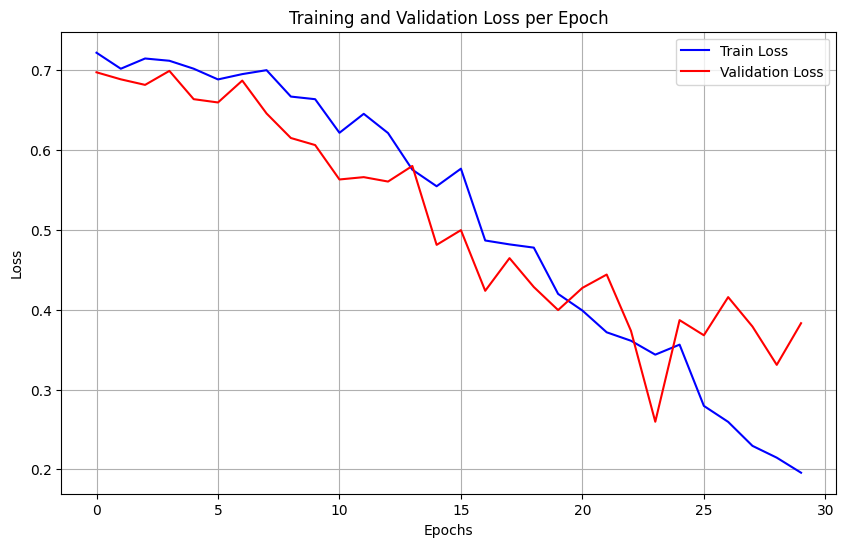

In [18]:
import pandas as pd
from torch.utils.data import DataLoader
from models.model_clam import CLAM_SB
import torch
import torch.nn as nn
import torch.optim as optim
from topk.svm import SmoothTop1SVM
from tqdm import tqdm
from sklearn.metrics import roc_curve, auc

wsi_df = pd.read_csv(wsi_labels_path)
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_list = []
val_list = []

for _, row in wsi_df.iterrows():
    membership = row['split_membership']
    if membership == 'train':
        train_list.append(row)
    elif membership == 'val':
        val_list.append(row)
        
train_dataset,val_dataset = WSI_dataset(train_list,features_path),WSI_dataset(val_list,features_path)
batch_size = 1
shuffle = True
num_workers = 4
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers)

loss_fn = nn.CrossEntropyLoss()
instance_loss_fn = SmoothTop1SVM(n_classes = 2).cuda()

model_dict = {"dropout": True, 'n_classes': 2,"size_arg": 'small','k_sample': 8}

model = CLAM_SB(**model_dict, instance_loss_fn=instance_loss_fn)
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0002, weight_decay=1e-5)

model.relocate() #met le modele sur le device (gpu)

model.train()


bag_weight = 0.7
num_epochs = 50

train_loss_list = []
val_loss_list = []
best_f1 = 0
best_loss = float('inf')
early_stopping_counter = 0
for epoch in range(num_epochs):
    train_loss = 0.
    val_loss = 0.
    print('starting epoch ',epoch)
    model.train()
    for index, (features, label) in enumerate(tqdm(train_loader)):
        features = features.to(device)
        label = label.to(device)
        
        logits, Y_prob, pred, _, instance_dict = model(features, label=label, instance_eval=True)
        loss = loss_fn(logits, label)
        instance_loss = instance_dict['instance_loss']
        total_loss = bag_weight * loss + (1-bag_weight) * instance_loss 
        train_loss += loss.item()
        total_loss.backward()
    
        optimizer.step()
        optimizer.zero_grad()
    train_loss /= len(train_loader)
    print('Epoch: {}, train_loss: {:.4f}'.format(epoch, train_loss))
    model.eval()
    total_acc = 0
    false_pos = 0
    true_pos = 0
    true_neg = 0
    false_neg = 0
    all_preds_prob = []
    all_labels = []
    for index, (features, label) in enumerate(tqdm(val_loader)):
        #print('starting batch ',index)
        features = features.to(device)
        label = label.to(device)
        with torch.no_grad():
            logits, Y_prob, Y_hat, _, instance_dict = model(features, label=label, instance_eval=False)
            loss = loss_fn(logits, label)
            val_loss += loss.item()
            all_preds_prob.append(Y_prob[0][1].cpu())
            all_labels.append(label.cpu())
            pred = 0
            if(Y_prob[0][1]>0.49):
                pred = 1
            else:
                pred = 0
            if(pred == label):
                total_acc+=1
                if(pred==1):
                    true_pos+=1
                else:
                    true_neg+=1
            else:
                if(pred==1):
                    false_pos+=1
                else:
                    false_neg+=1

    if(true_pos == 0):
        precision=0
        recall=0
        f1=0
    else:
        precision = true_pos / (true_pos+false_pos)
        recall = true_pos / (true_pos+false_neg)
        f1 = (2*precision*recall)/(precision+recall)
    total_acc /= len(val_loader)
    val_loss /= len(val_loader)
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)
    fpr, tpr, thresholds = roc_curve(all_labels, all_preds_prob)
    roc_auc = auc(fpr, tpr)
    print('Epoch: {}, val_loss: {:.4f}, AUC: {:.2f}, accuracy: {:.2f}, precision: {:.2f}, recall: {:.2f}, f1: {:.2f}'.format(epoch, val_loss, roc_auc,total_acc, precision, recall, f1))
    if val_loss < best_loss:
            model_path = './CLAM_100.pt'
            torch.save(model.state_dict(), model_path)
            best_f1 = f1
            best_loss = val_loss
            best_epoch = epoch
            early_stopping_counter = 0
    
    else:
        early_stopping_counter+=1
        if(early_stopping_counter>5):
            print("Loss hasn't improved for more than 5 epochs - early stopping")
            break
       
print('Best epoch : ',best_epoch,'\n,Loss from best epoch:',best_loss,'\nF1 from best epoch : ',best_f1)
plot_combined_loss(train_loss_list, val_loss_list, range(0,epoch+1))